## Predictive Codingを簡単な変数で確認

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [136]:
U = 3
r = 0
I = 1

#k1 = 0.5
k1 = 0.05
sigma_sq = 1.0

for i in range(10):
    error = I - U * r
    #dr = (k1 / sigma_sq) / U * error
    dr = (k1 / sigma_sq) * U * error
    r += dr
    print("dr={} r={}".format(dr, r))

dr=0.15000000000000002 r=0.15000000000000002
dr=0.0825 r=0.23250000000000004
dr=0.04537499999999999 r=0.27787500000000004
dr=0.024956249999999996 r=0.30283125000000005
dr=0.013725937499999986 r=0.31655718750000006
dr=0.007549265624999975 r=0.324106453125
dr=0.00415209609374998 r=0.32825854921875003
dr=0.002283652851562479 r=0.3305422020703125
dr=0.0012560090683593817 r=0.33179821113867186
dr=0.0006908049875976708 r=0.3324890161262695


$$
I = \frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{(I-Ur)^2}{2 \sigma^2}} \\
\log I = -\frac{1}{2} \log(2\pi \sigma^2) - \frac{(I-Ur)^2}{2 \sigma^2} \\
\frac{d \log I}{dr} = U \frac{I - Ur}{\sigma^2}
$$

$$
y = M x \\
x = M^{-1} y
$$

### rに関して

- dr0 =  0.018 bottom-up での U.T * error
- dr1 = -0.001 top-down での error_td
- dr2 = -0.017 事前分布での

この3つを合計するとdr=0となり平衡状態になる.

Iの部分でのerrorがあることで、事前分布による項をキャンセルする形になっている.

- Ur = 0.85
- U = 2.5
- r = 0.34

Iの部分のerrorは0.15

### rhに関して

- drh0 = -0.008
- drh1 =  0.008


- error_td = -0.3
- Uh       = -0.27

Uhが小さいことにより、rhの事前分布の項をキャンセルする為に、ある程度の大きさがあるerror_tdを求めてしまう.

Ur=0.9908361634207513
U=[0.72502673]
r=[1.3666202]
Uh=[-0.63016852]
Uh_rh=1.3121486384484924
rh=[-2.0822186]
error=0.009164576981936401
error_td=[-0.05447841]
dU=[-3.12078557e-05]
dr=[5.98504314e-05]
dr0=[0.00033223]
dr1=[-0.00027239]
dr2=[-0.06833101]
drh0=-0.00017165288465167066
drh1=[0.00520555]


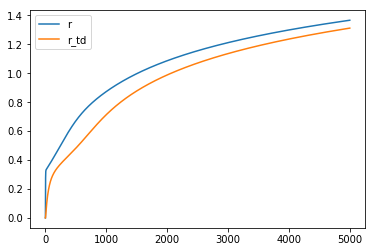

In [146]:
iteration = 5000
k2_decay_interval = 40

#k1 = 0.5
#k2 = 1.0

k1 = 0.05
k2 = 0.1

sigma_sq    = 1.0  # Iの生成観測分布の分散
sigma_sq_td = 10.0 # rの生成観測分布の分散
alpha1      = 1.0  # rの事前分布の精度パラメータ  (分散=1.0, 標準偏差1.0)
alpha2      = 0.05 # rhの事前分布の精度パラメータ (分散=20.0, 標準偏差4.5)
lambd       = 0.02 # Uの事前分布の精度パラメータ　(分散=50.0, 標準偏差7.1)

U   = np.array([3.0])
Uh  = np.array([-2.0])
r   = np.zeros([1], dtype=np.float32)
rh  = np.zeros([1], dtype=np.float32)

error_td = np.zeros([1], dtype=np.float32)

I = 1

train_U    = True
use_level2 = True
use_prior  = False

rs = []
r_tds = []

for i in range(iteration):
    r_td = Uh.dot(rh)
    Ur   = U.dot(r)
    
    rs.append(r.copy())
    r_tds.append(r_td)
    
    error    = I - Ur
    error_td = r_td - r
    
    if use_level2:
        dr = (k1/sigma_sq) * U.T.dot(error) + (k1/sigma_sq_td) * error_td
    else:
        dr = (k1/sigma_sq) * U.T.dot(error)
    if use_prior:
        dr -= (k1 * alpha1 * r)
    
    dU = (k2 / sigma_sq) * error * r - k2 * lambd * U
    r += dr
    
    if train_U:
        U += dU

    if use_level2:
        drh = (k1 / sigma_sq_td) * Uh.T.dot(-error_td)
        if use_prior:
            drh -= k1 * alpha2 * rh
        dUh = (k2 / sigma_sq_td) * (-error_td) * rh    - k2 * lambd * Uh        

        rh += drh
        Uh += dUh
        
    if i % k2_decay_interval == k2_decay_interval-1:
        k2 = k2 / 1.015
    
    
print("Ur={}".format(U.dot(r)))
print("U={}".format(U))
print("r={}".format(r))
print("Uh={}".format(Uh))
print("Uh_rh={}".format(Uh.dot(rh)))
print("rh={}".format(rh))
print("error={}".format(error))
print("error_td={}".format(error_td))
print("dU={}".format(dU))

print("dr={}".format(dr))
print("dr0={}".format((k1/sigma_sq) * U.T.dot(error)))
print("dr1={}".format((k1/sigma_sq_td) * error_td))
print("dr2={}".format(-(k1 * alpha1 * r)))

print("drh0={}".format((k1 / sigma_sq_td) * Uh.T.dot(-error_td)))
print("drh1={}".format(- k1 * alpha2 * rh))


plt.plot(rs, label="r")
plt.plot(r_tds, label="r_td")
plt.legend()
plt.show()

In [78]:
0.33 * (4/5)

0.264

In [112]:
k2

0.015550512935224338

Ur=0.8521390988307361
U=[2.50996073]
r=[0.33950296]
Uh=[-0.19185406]
rh=[-0.12133904]
Uh_rh=0.023279386490486147
error=0.14786090118132555
dU=[3.55277952e-11]
dr=[-1.26001957e-08]
dr0=[0.01855625]
dr1=[-0.00158112]
dr2=[-0.01697515]


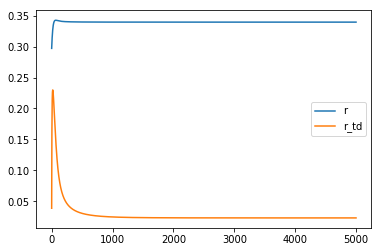

In [128]:
iteration = 5000
local_iteration = 10

k1 = 0.05
k2 = 0.1

#k1 = 0.5
#k2 = 1.0

sigma_sq    = 1.0  # Iの生成観測分布の分散
sigma_sq_td = 10.0 # rの生成観測分布の分散
alpha1      = 1.0  # rの事前分布の精度パラメータ  (分散=1.0, 標準偏差1.0)
alpha2      = 0.05 # rhの事前分布の精度パラメータ (分散=20.0, 標準偏差4.5)
lambd       = 0.02 # Uの事前分布の精度パラメータ　(分散=50.0, 標準偏差7.1)

U   = np.array([3.0])
Uh  = np.array([-2.0])

r   = np.zeros([1], dtype=np.float32)
rh  = np.zeros([1], dtype=np.float32)
                
error_td = np.zeros([1], dtype=np.float32)

I = 1

rs = []
r_tds = []

k2_decay_interval = 40
    
for i in range(iteration):    
    for j in range(local_iteration):
        r_td = Uh.dot(rh)
        Ur = U.dot(r)
    
        error    = I - Ur
        error_td = r_td - r
    
        dr = (k1 / sigma_sq) * U.T.dot(error) + (k1/sigma_sq_td) * error_td
        dr -= (k1 * alpha1 * r)    
        r += dr
        
        drh = (k1 / sigma_sq_td) * Uh.T.dot(-error_td) - k1 * alpha2 * rh
        rh += drh
            
    rs.append(r.copy())
    r_tds.append(r_td)
        
    for j in range(local_iteration):
        r_td = Uh.dot(rh)
        Ur = U.dot(r)
    
        error    = I - Ur
        error_td = r_td - r        
        
        dU = (k2 / sigma_sq) * error * r - k2 * lambd * U
        U += dU

        dUh = (k2 / sigma_sq_td) * (-error_td) * rh - k2 * lambd * Uh        
        Uh += dUh
        
    if i % k2_decay_interval == k2_decay_interval-1:
        k2 = k2 / 1.015
    

print("Ur={}".format(U.dot(r)))
print("U={}".format(U))
print("r={}".format(r))
print("Uh={}".format(Uh))
print("rh={}".format(rh))
print("Uh_rh={}".format(Uh.dot(rh)))
print("error={}".format(error))
print("dU={}".format(dU))
print("dr={}".format(dr))
print("dr0={}".format((k1/sigma_sq) * U.T.dot(error)))
print("dr1={}".format((k1/sigma_sq_td) * error_td))
print("dr2={}".format(-(k1 * alpha1 * r)))

plt.plot(rs, label="r")
plt.plot(r_tds, label="r_td")
plt.legend()
plt.show()